Linear Regression R2: 0.920848505580741
Linear Regression RMSE: 2.872295759280087
Random Forest R2: 0.9973106162417166
Random Forest RMSE: 0.5294512602808564


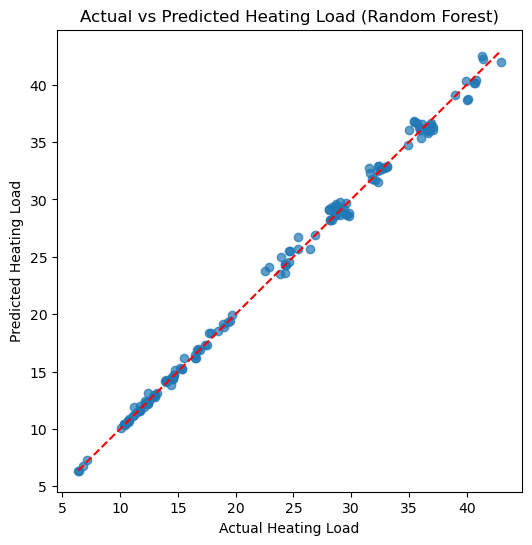

Top 5 important features:
  feature  importance
0      X1    0.389655
1      X2    0.239430
4      X5    0.122841
3      X4    0.115875
5      X7    0.089476


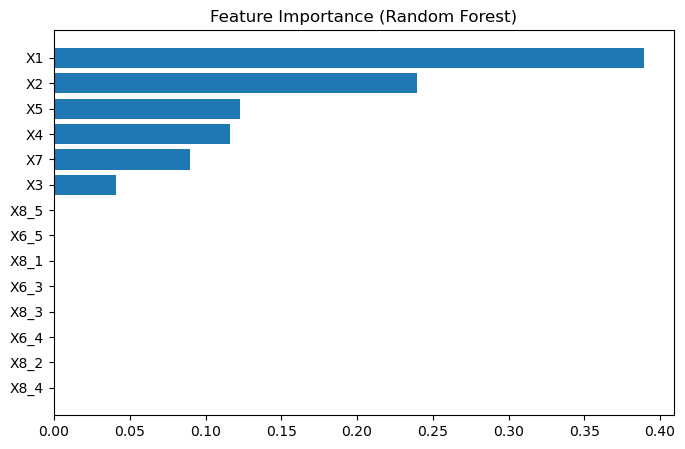

In [43]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Step 2: Load dataset (CSV)
df = pd.read_csv("ENB2012_data.csv")

# Step 3: Define features and target
X = df.drop(columns=["Y1", "Y2"])  # features
y = df["Y1"]  # target: Heating Load

# Step 4: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define numeric and categorical features
numeric_features = ["X1", "X2", "X3", "X4", "X5", "X7"]
categorical_features = ["X6", "X8"]

numeric_transformer = Pipeline(steps=[("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("onehot", OneHotEncoder(drop="first", sparse_output=False))])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# Step 6: Linear Regression
lr = Pipeline(steps=[("preprocessor", preprocessor),
                     ("model", LinearRegression())])
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Metrics for Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", rmse_lr)

# Step 7: Random Forest
rf = Pipeline(steps=[("preprocessor", preprocessor),
                     ("model", RandomForestRegressor(n_estimators=200, random_state=42))])
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Metrics for Random Forest
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", rmse_rf)

# Step 8: Plot actual vs predicted for Random Forest
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load (Random Forest)")
plt.show()

# Step 9: Feature importance from Random Forest
rf_model = rf.named_steps["model"]

# Get processed feature names after one-hot encoding
feature_names = (numeric_features + 
                 list(rf.named_steps["preprocessor"].transformers_[1][1]\
                      .named_steps['onehot'].get_feature_names_out(categorical_features)))

importances = rf_model.feature_importances_
feat_imp_df = pd.DataFrame({"feature": feature_names, "importance": importances})
feat_imp_df = feat_imp_df.sort_values(by="importance", ascending=False)

print("Top 5 important features:")
print(feat_imp_df.head())

# Plot feature importance
plt.figure(figsize=(8,5))
plt.barh(feat_imp_df["feature"], feat_imp_df["importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Random Forest)")
plt.show()




